[View in Colaboratory](https://colab.research.google.com/github/jerome9189/scary-dome/blob/master/keras-model.ipynb)

In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import scale
from keras.utils import plot_model

import pandas as pd
import numpy as np
from google.colab import files
!pip install -U -q PyDrive ## you will have install for every colab session
!pip install -U -q pydot
!pip install graphviz
!apt-get install graphviz
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from matplotlib import cm
from sklearn.model_selection import train_test_split
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


Download Breast Cancer Wisconsin (Diagnostic) Data Set from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Then upload to Google Drive.

In [0]:
#import dataset from Google Drive
dataset = drive.CreateFile({'id': '1ijIZ2A8kb5sX__oytq1nO0-W-lSUsO0G'}) #replace id with your own file id from google drive(get shareable link)
dataset.GetContentFile('train.csv')

data = pd.read_csv('train.csv')


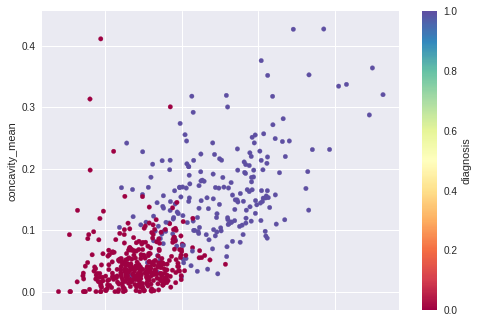

In [3]:
#changing 'M' and 'B' labels to 1s and 0s
data['diagnosis'].replace('M', 1.0,inplace=True)
data['diagnosis'].replace('B', 0.0,inplace=True)

#visualizing a couple of features
data.plot.scatter(x='radius_mean', y='concavity_mean', c='diagnosis',colormap = cm.get_cmap('Spectral'))

In [0]:
#changing dataframe to numpy array
npdata = data.values

In [0]:
#splitting train-dev-test
train, test = train_test_split(npdata, test_size=0.3)
dev, test = train_test_split(test, test_size=0.5)

X_train = train[:, 2:32]
Y_train = train[:, 1]
X_dev = dev[:, 2:32]
Y_dev = dev[:, 1]
X_test = test[:, 2:32]
Y_test = test[:, 1]

In [0]:
#preprocessing, z score standardization
mean = np.mean(X_train, axis = 0)
stddev = np.std(X_train, axis = 0)
X_train = (X_train - mean)/stddev
X_dev = (X_dev - mean)/stddev
X_test = (X_test - mean)/stddev

In [7]:
#model setup and train
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(1, input_dim=input_dim, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=Y_train, batch_size=1, epochs=64, verbose=2)

Epoch 1/64
 - 3s - loss: 0.4913 - acc: 0.8116
Epoch 2/64
 - 2s - loss: 0.2414 - acc: 0.9397
Epoch 3/64
 - 2s - loss: 0.1730 - acc: 0.9523
Epoch 4/64
 - 2s - loss: 0.1370 - acc: 0.9648
Epoch 5/64
 - 2s - loss: 0.1148 - acc: 0.9698
Epoch 6/64
 - 2s - loss: 0.0991 - acc: 0.9673
Epoch 7/64
 - 2s - loss: 0.0884 - acc: 0.9698
Epoch 8/64
 - 2s - loss: 0.0805 - acc: 0.9774
Epoch 9/64
 - 2s - loss: 0.0747 - acc: 0.9774
Epoch 10/64
 - 2s - loss: 0.0701 - acc: 0.9799
Epoch 11/64
 - 2s - loss: 0.0663 - acc: 0.9799
Epoch 12/64
 - 2s - loss: 0.0634 - acc: 0.9824
Epoch 13/64
 - 2s - loss: 0.0609 - acc: 0.9874
Epoch 14/64
 - 2s - loss: 0.0586 - acc: 0.9849
Epoch 15/64
 - 2s - loss: 0.0567 - acc: 0.9925
Epoch 16/64
 - 2s - loss: 0.0548 - acc: 0.9899
Epoch 17/64
 - 2s - loss: 0.0533 - acc: 0.9899
Epoch 18/64
 - 2s - loss: 0.0518 - acc: 0.9899
Epoch 19/64
 - 2s - loss: 0.0506 - acc: 0.9874
Epoch 20/64
 - 2s - loss: 0.0492 - acc: 0.9899
Epoch 21/64
 - 2s - loss: 0.0481 - acc: 0.9899
Epoch 22/64
 - 2s - lo

Epoch 47/64
 - 2s - loss: 0.0349 - acc: 0.9925
Epoch 48/64
 - 2s - loss: 0.0346 - acc: 0.9925
Epoch 49/64
 - 2s - loss: 0.0344 - acc: 0.9925
Epoch 50/64
 - 2s - loss: 0.0341 - acc: 0.9925
Epoch 51/64
 - 2s - loss: 0.0339 - acc: 0.9925
Epoch 52/64
 - 2s - loss: 0.0337 - acc: 0.9925
Epoch 53/64
 - 2s - loss: 0.0334 - acc: 0.9925
Epoch 54/64
 - 2s - loss: 0.0333 - acc: 0.9925
Epoch 55/64
 - 2s - loss: 0.0330 - acc: 0.9925
Epoch 56/64
 - 2s - loss: 0.0330 - acc: 0.9925
Epoch 57/64
 - 2s - loss: 0.0326 - acc: 0.9925
Epoch 58/64
 - 2s - loss: 0.0325 - acc: 0.9925
Epoch 59/64
 - 2s - loss: 0.0323 - acc: 0.9925
Epoch 60/64
 - 2s - loss: 0.0321 - acc: 0.9925
Epoch 61/64
 - 2s - loss: 0.0320 - acc: 0.9925
Epoch 62/64
 - 2s - loss: 0.0319 - acc: 0.9925
Epoch 63/64
 - 2s - loss: 0.0317 - acc: 0.9925
Epoch 64/64
 - 2s - loss: 0.0314 - acc: 0.9925


In [14]:
#model evaluation
model.evaluate(x=X_dev, y=Y_dev, verbose=1)
cost, accuracy = model.evaluate(x=X_test, y=Y_test, verbose=1)
print('Accuracy:' + str(accuracy))

86/86 [==============================] - 0s 170us/step
Accuracy:0.9651162790697675


In [0]:
#visualizing model
plot_model(model, to_file='model.png')
files.download('model.png')